<a href="https://colab.research.google.com/github/everluiz/Machine-learning-class/blob/main/DistGauss_Formula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
from mlxtend.plotting import scatterplotmatrix
import scipy as sp
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/f1.csv')

df.head()

,id,Time-Q1,Time-Q2,Time-Q3,driver,Pos,Year,Races,Fastest Lap,Grid,Team
0,1,1:25.900,1:25.347,1:24.303,Lewis Hamilton,1.0,2020,Silverstone,1:28.689,1,Mercedes
1,2,1:25.801,1:25.015,1:24.616,Valtteri Bottas,11.0,2020,Silverstone,1:27.097,2,Mercedes
2,3,1:25.513,1:25.840,1:25.099,Lewis Hamilton,1.0,2019,Silverstone,1:27.369,2,Mercedes
3,4,1:25.750,1:25.672,1:25.093,Valtteri Bottas,2.0,2019,Silverstone,1:27.406,1,Mercedes
4,5,1:30.739,1:29.243,1:29.287,Lewis Hamilton,1.0,2016,Silverstone,1:35.771,1,Mercedes


Mapeamento dos nomes das equipes de corrida (classes)

e mapeando os nomes das caracteristicas pilotos e pistas

Eliminação das amostras com valores faltando

In [ ]:
T = {'Mercedes': 0,
     'Red Bull': 1,}

d = {'Lewis Hamilton': 0,
     'Valtteri Bottas': 1,
     'Nico Rosberg': 2,
     'Max Verstappen': 3,
     'Alexander Albon': 4,
     'Pierre Gasly': 5,
     'Daniel Ricciardo': 6,}

R = {'Silverstone': 0,
     'Austria': 1,
     'Barcelona': 2,
     'Hungria': 3,}
     
df['Team'] = df['Team'].map(T)
df['driver'] = df['driver'].map(d)
df['Races'] = df['Races'].map(R)
df = df.dropna() # Elimina linhas com NaN (valores faltando)

X = df.iloc[:, 1:10].values
y = df['Team'].values

Matriz X com valores das caracteristicas

Vetor Y com os valores das classes

loop for para converter strings do tempo dos pilotos para timestamp (float)

In [ ]:
 X = df.iloc[:, 1:10].values
 y = df['Team'].values
M = np.ndarray(shape=(len(X[:,]),4))

for i in range(0,len(X[:,])):
    dt = datetime.strptime(X[i,0], "%M:%S.%f")
    M[i,0] = dt.second*1000000 + dt.microsecond
    X[i,0] = time.mktime(dt.timetuple()) + (dt.microsecond / 1000000.0) # conversão para timestamp
    dt = datetime.strptime(X[i,1], "%M:%S.%f")
    M[i,1] = dt.second*1000000 + dt.microsecond
    X[i,1] = time.mktime(dt.timetuple()) + (dt.microsecond / 1000000.0) # conversão para timestamp
    dt = datetime.strptime(X[i,2], "%M:%S.%f")
    M[i,2] = dt.second*1000000 + dt.microsecond
    X[i,2] = time.mktime(dt.timetuple()) + (dt.microsecond / 1000000.0) # conversão para timestamp
    dt = datetime.strptime(X[i,7], "%M:%S.%f")
    M[i,3] = dt.second*1000000 + dt.microsecond
    X[i,7] = time.mktime(dt.timetuple()) + (dt.microsecond / 1000000.0) # conversão para timestamp

In [ ]:
df['Time-Q1'] = X[:,0]
df['Time-Q2'] = X[:,1]
df['Time-Q3'] = X[:,2]
df['Fastest Lap'] = X[:,7]
#print(datetime.utcfromtimestamp(df[1,0]).strftime('%M:%S.%f')) # print do tempo
# a=df.iloc[:,1].values
# print(a[0])

# Verificação das características quanto a distribuição gaussiana
**Histograma das características das equipes de formula 1**

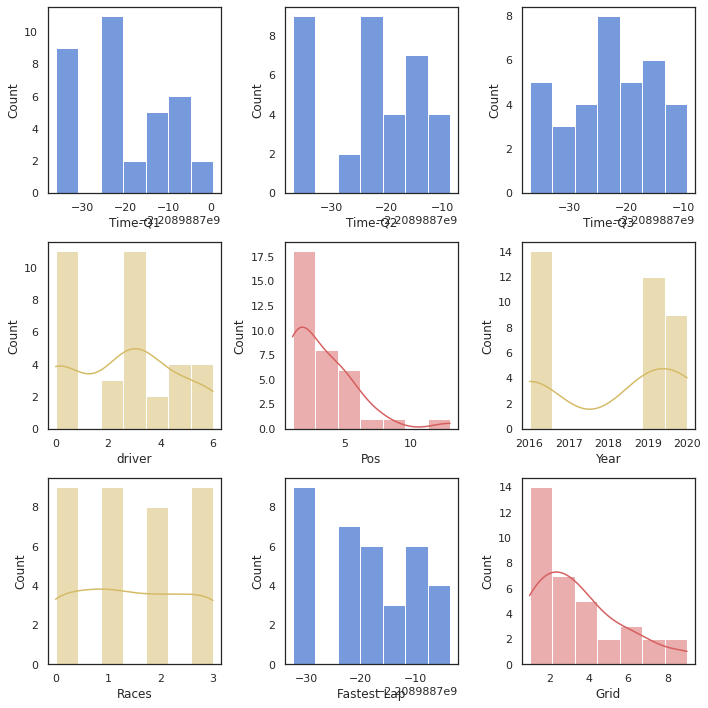

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)


f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False)
sns.histplot(data=df,x="Time-Q1",color="b", ax=axes[0, 0])
sns.histplot(data=df,x="Time-Q2",color="b", ax=axes[0, 1])
sns.histplot(data=df,x="Time-Q3",color="b", ax=axes[0, 2])
sns.histplot(data=df,x="driver",color="y", ax=axes[1, 0],kde=True)
sns.histplot(data=df,x="Pos",color="r", ax=axes[1, 1],kde=True)
sns.histplot(data=df,x="Year",color="y", ax=axes[1, 2],kde=True)
sns.histplot(data=df,x="Races",color="y", ax=axes[2, 0],kde=True)
sns.histplot(data=df,x="Fastest Lap",color="b", ax=axes[2, 1])
sns.histplot(data=df,x="Grid",color="r", ax=axes[2, 2],kde=True)
plt.tight_layout()

Interpretando os plots acima é possivel distinguir certos aspectos das caracteristicas, por exemplo, nas qualificações Q1,Q2 e Q3 existe uma leve mudança na distribuição skewed para a direita entre as etapas de qualificação, mas como estes valores skewness

(a = (media-moda)/desvio) estão entre -0.5 < a < 0.5, as distribuições são consideradas aproximadamente simetricas. 

Isto representa a procura da redução de tempo de volta dos pilotos em busca da melhor classificação no grid de largada

In [ ]:
skew = sp.stats.skew(X[:,0])
skew2 = sp.stats.skew(X[:,1])
skew3 = sp.stats.skew(X[:,2])
print('Skewed Time-Q1:', skew,'\nSkewed Time-Q2:',skew2,'\nSkewed Time-Q3:', skew3)

Skewed Time-Q1: 0.13502794577949323 
Skewed Time-Q2: -0.23843002164585142 
Skewed Time-Q3: -0.1569312339132459


As caracteristicas Grid e Pos (posição de largada e resultado final da corrida) possuem distribuição skewed para a esquerda (a > 0.5).

 Isto se dá pois a maioria das amostras são dos pilotos a frente do campeonato.

In [ ]:
skew = sp.stats.skew(X[:,4])
skew2 = sp.stats.skew(X[:,8])
print('Skewed Pos:',skew,'\nSkewed Grid:', skew2)

Skewed Pos: 1.7243752480428896 
Skewed Grid: 0.9179902159881078


Por fim as caracteristicas categóricas (pilotos ou Drivers,pista ou Races e volta mais rápida ou Fastest Lap) apresentam distribuições aproximadamente simetricas como uma gaussiana tradicional.  

Em contrapartida, a caracterisitica do ano da corrida ou Year não tem distribuição normal gaussiana. Caso fosse plotar o KDE (Year) de cada classe separado obteriamos a mesma resposta, pois os anos das amostras são distribuidos igualmente para as duas classes (mercedes, red bull).

In [ ]:
skew = sp.stats.skew(X[:,3])
skew2 = sp.stats.skew(X[:,5])
skew3 = sp.stats.skew(X[:,6])
skew4 = sp.stats.skew(X[:,7])
print('Skewed Driver:',skew,'\nSkewed Year:', skew2,'\nSkewed Races:', skew3,'\nSkewed Fastest Lap:', skew4)

Skewed Driver: 0.07928859719457412 
Skewed Year: -0.25598399002280453 
Skewed Races: 0.035436000504454376 
Skewed Fastest Lap: -0.029790740318375815


# Verificação de correlação/covariância
**Scatterplot matrix**

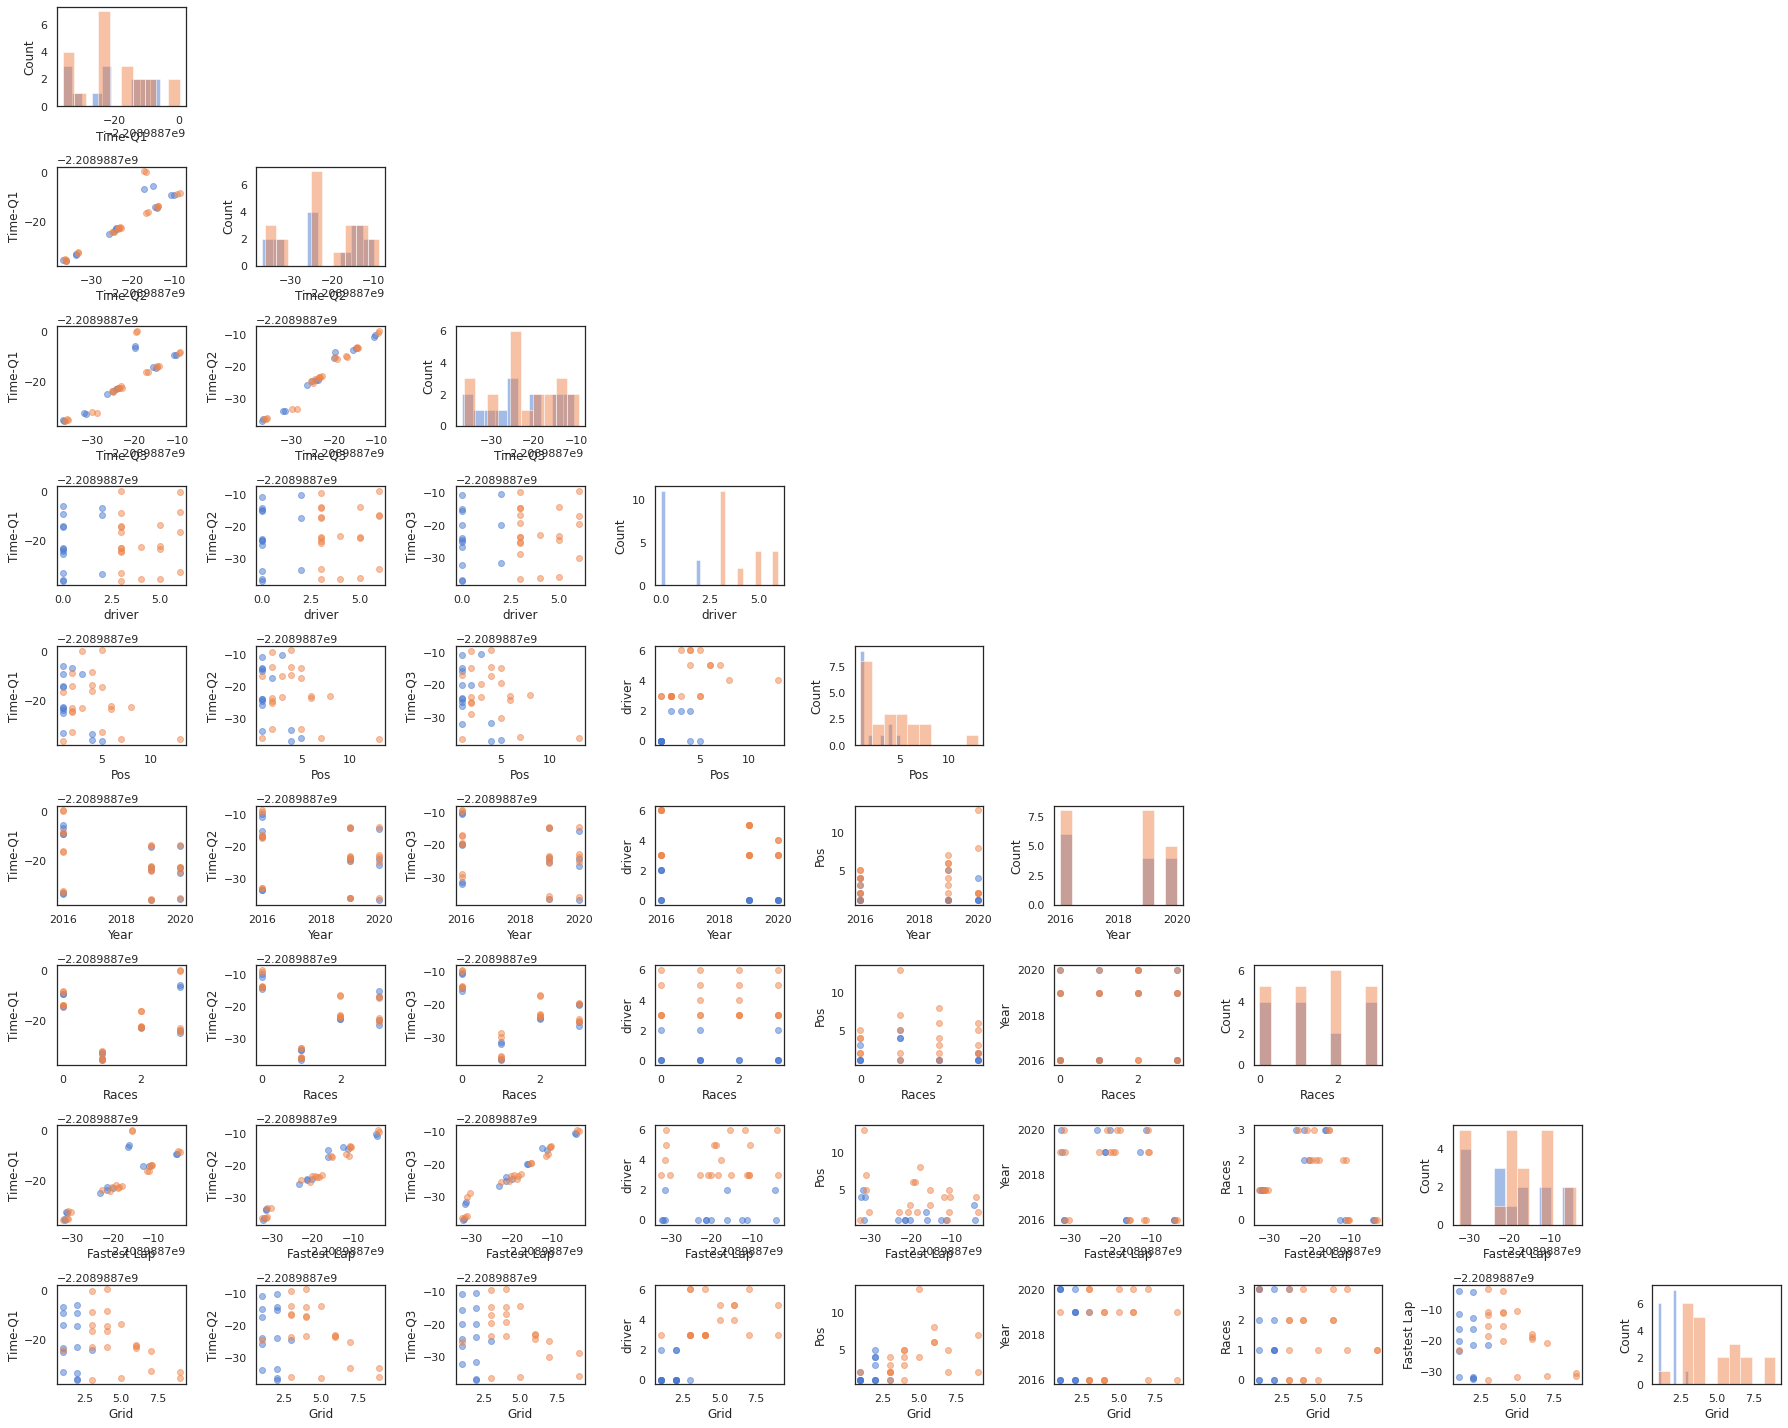

In [ ]:
names = df.columns[1:10]

fig, axes = scatterplotmatrix(X[y==0], figsize=(25, 20), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5, names=names)
plt.tight_layout()
plt.show()

Os plots de Tempo de qualificação vs Tempo de qualificação apresentam correlação positiva (correlação maior em Time-Q3 vs Time-Q2)

Outras correlações são o tempo de volta rápida com os tempos de qualificação Q1, Q2 e Q3. (Fastest Lap vs Time-Q1 tem alguns valores dispersos)

In [ ]:
df['Time-Q1'] = pd.to_numeric(df['Time-Q1'], errors='coerce') #conversão tipo object para float dos tempos
df['Time-Q2'] = pd.to_numeric(df['Time-Q2'], errors='coerce')
df['Time-Q3'] = pd.to_numeric(df['Time-Q3'], errors='coerce')
df['Fastest Lap'] = pd.to_numeric(df['Fastest Lap'], errors='coerce')

**Heatmap da covariância**

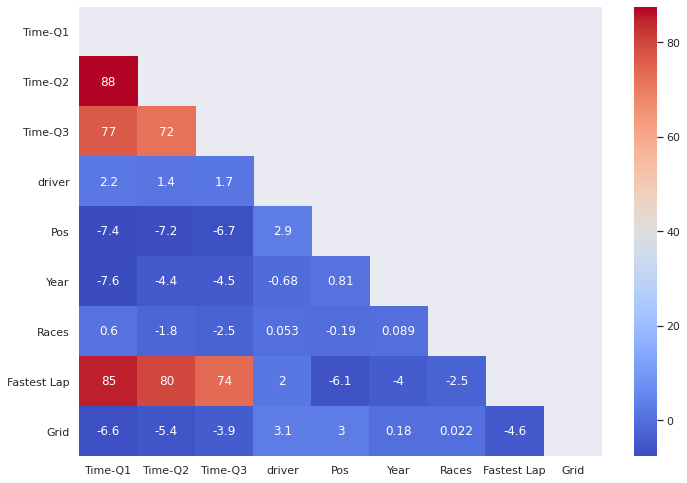

In [ ]:
X = df.iloc[:,1:10]
sns.set(rc={'figure.figsize':(11.7,8.27)}) # seta o tamanho do plot
cov = X.cov()
matrix = np.triu(cov)
ax2 = sns.heatmap(cov,annot = True, cmap= 'coolwarm',mask=matrix)

**Heatmap das correlações**

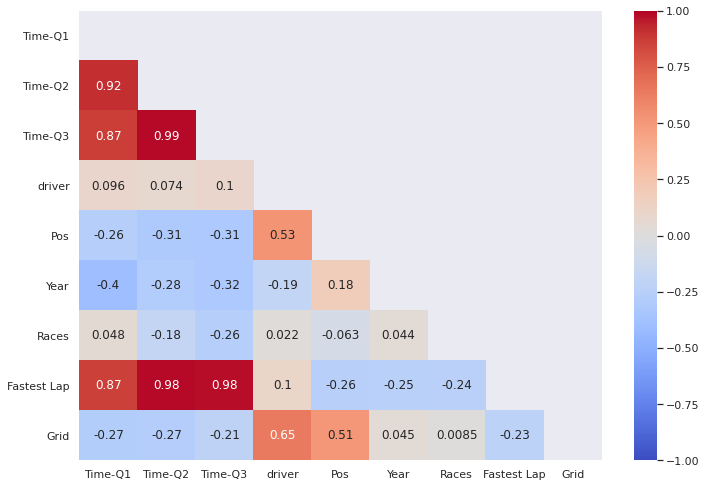

In [ ]:
correlacao = X.corr()
matrix = np.triu(correlacao) # matrix diagonal superior das correlações
ax = sns.heatmap(correlacao,annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',mask=matrix)

como dito anteriormente, os tempos de classificação e volta rápida possuem correlação forte, podemos verificar também uma correlação interessante entre pilotos e Grid de largada, (quase sempre pilotos da mercedes largam na pole, enquanto pilotos da redbull largam em terceiro ou menor posição).

 Posição final na corrida(Pos) tem correlação de ~50% com os pilotos e grid de largada. Ou seja, na metade das vezes o resultado final da corrida se dá por quem larga na frente e/ou por qual piloto dirige.

**Calculo de outliers das variáveis independentes (univariadas), ou seja, que possuem covariância proxima a zero.**

E que seguem aproximadamente uma distribuição gaussiana

In [ ]:
X = X[["Pos","Grid"]]

media = np.mean(X) # calculo da media
desvio = np.std(X) # calculo desvio padrão
faixa = desvio*3   # valores na faixa de três vezes o desvio padrão
lim_inferior = media - faixa # limite inferior 
lim_superior = media + faixa # limite superior
coluna = X.columns

for x in X.values:
  aux = 0 # conta qual coluna está o outlier
  for i, j, k in zip(x, lim_inferior,lim_superior):
    if (i < j or i > k): # valores abaixo do limite inferior ou acima do limite superior
      print("outlier: [",i,"] Caracteristica: ",coluna[aux],".")
    aux += 1

outlier: [ 13.0 ] Caracteristica:  Pos .


a unica característica com elemento fora de 3 vezes o desvio padrão (outlier) é a Posição de chegada - Pos. 

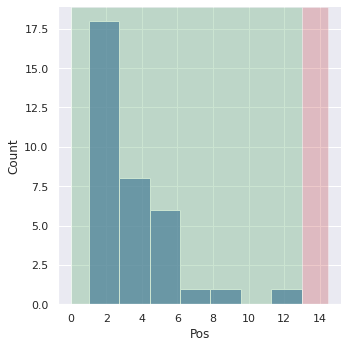

In [ ]:
sns.displot(X['Pos']);
plt.axvspan(0,12.99, facecolor='g', alpha=0.3)
plt.axvspan(13,14.5, facecolor='r', alpha=0.3)


**Calculo de outliers das variáveis multivariadas, ou seja, que possuem alta covariância entre elas.**

E que seguem aproximadamente uma distribuição gaussiana

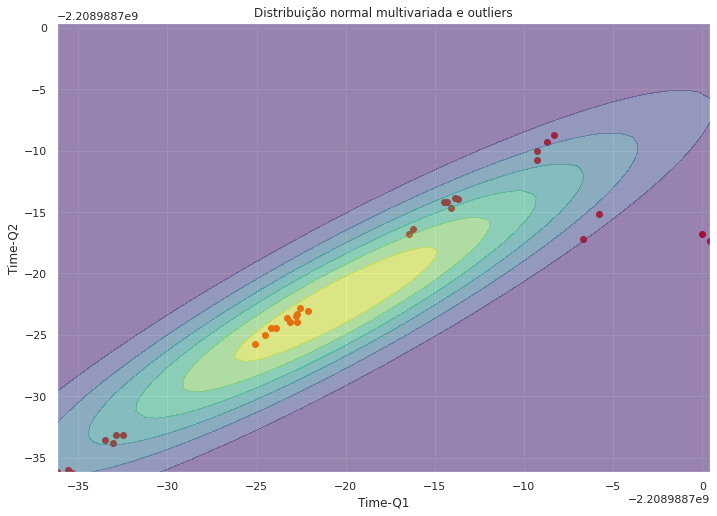

In [ ]:
from scipy.stats import multivariate_normal

X = df.iloc[:,[False, True, True, False, False, False, False, False, False, False,False]]
x = X[["Time-Q1"]].values
y = X[["Time-Q2"]].values

N = 60
xx = np.linspace(x.min(), x.max(), N)
yy = np.linspace(x.min(), x.max(), N)

xx, yy = np.meshgrid(xx, yy)
pos2 = np.dstack((xx,yy))

mu = np.mean(X)
Sigma = np.cov(X.T)

rv = multivariate_normal(mu, Sigma)
Z = rv.pdf(pos2)
X = X.values
plt.scatter(X[:,0], X[:,1], color='red')
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.title("Distribuição normal multivariada e outliers")
plt.ylabel("Time-Q2")
plt.xlabel("Time-Q1")
plt.show()


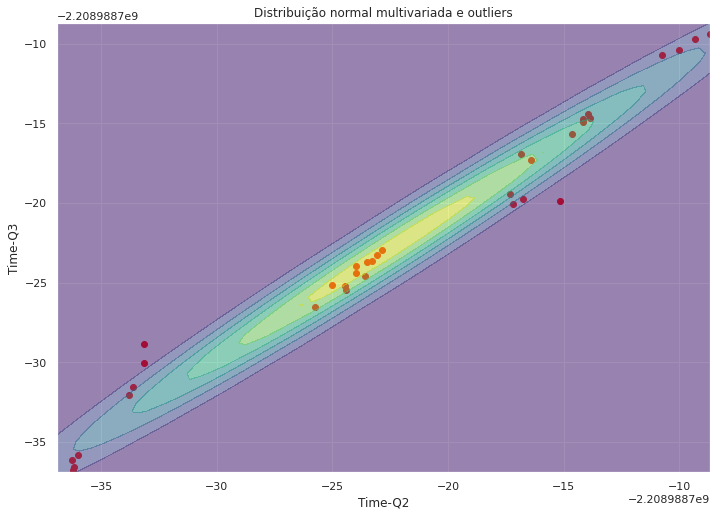

In [ ]:
X = df.iloc[:,[False, False, True, True, False, False, False, False, False, False,False]]
x = X[["Time-Q2"]].values
y = X[["Time-Q3"]].values

N = 60
xx = np.linspace(x.min(), x.max(), N)
yy = np.linspace(x.min(), x.max(), N)

xx, yy = np.meshgrid(xx, yy)
pos2 = np.dstack((xx,yy))

mu = np.mean(X)
Sigma = np.cov(X.T)

rv = multivariate_normal(mu, Sigma)
Z = rv.pdf(pos2)
X = X.values
plt.scatter(X[:,0], X[:,1], color='red')
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.title("Distribuição normal multivariada e outliers")
plt.ylabel("Time-Q3")
plt.xlabel("Time-Q2")
plt.show()

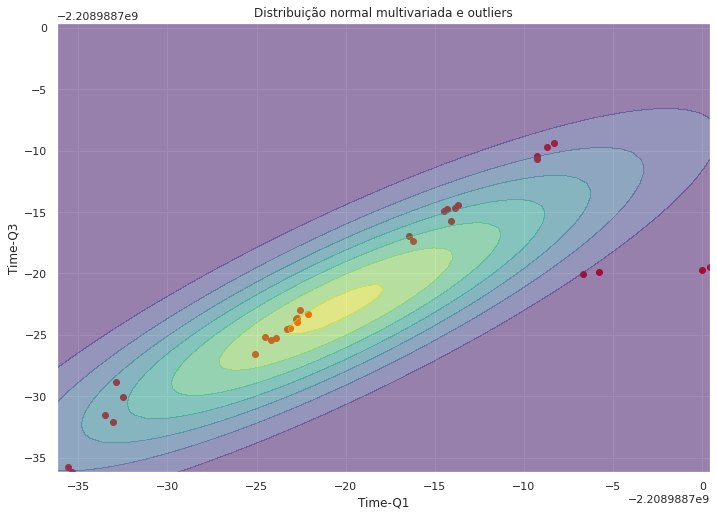

In [ ]:
X = df.iloc[:,[False, True, False, True, False, False, False, False, False, False,False]]
x = X[["Time-Q1"]].values
y = X[["Time-Q3"]].values

N = 60
xx = np.linspace(x.min(), x.max(), N)
yy = np.linspace(x.min(), x.max(), N)

xx, yy = np.meshgrid(xx, yy)
pos2 = np.dstack((xx,yy))

mu = np.mean(X)
Sigma = np.cov(X.T)

rv = multivariate_normal(mu, Sigma)
Z = rv.pdf(pos2)
X = X.values
plt.scatter(X[:,0], X[:,1], color='red')
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.title("Distribuição normal multivariada e outliers")
plt.ylabel("Time-Q3")
plt.xlabel("Time-Q1")
plt.show()

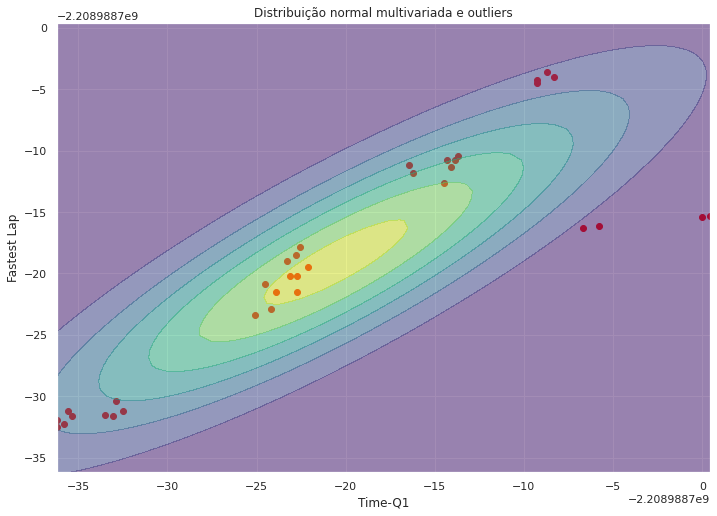

In [ ]:
X = df.iloc[:,[False, True, False, False, False, False, False, False, True, False,False]]
x = X[["Time-Q1"]].values
y = X[["Fastest Lap"]].values

N = 60
xx = np.linspace(x.min(), x.max(), N)
yy = np.linspace(x.min(), x.max(), N)

xx, yy = np.meshgrid(xx, yy)
pos2 = np.dstack((xx,yy))

mu = np.mean(X)
Sigma = np.cov(X.T)

rv = multivariate_normal(mu, Sigma)
Z = rv.pdf(pos2)
X = X.values
plt.scatter(X[:,0], X[:,1], color='red')
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.title("Distribuição normal multivariada e outliers")
plt.ylabel("Fastest Lap")
plt.xlabel("Time-Q1")
plt.show()

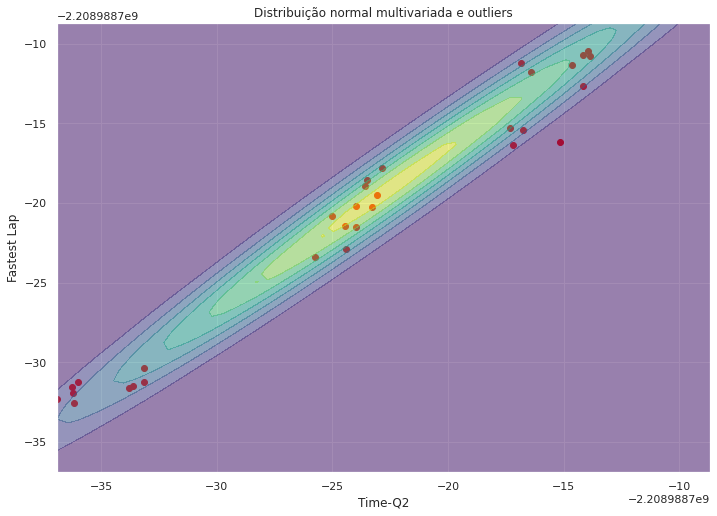

In [ ]:
X = df.iloc[:,[False, False, True, False, False, False, False, False, True, False,False]]
x = X[["Time-Q2"]].values
y = X[["Fastest Lap"]].values

N = 60
xx = np.linspace(x.min(), x.max(), N)
yy = np.linspace(x.min(), x.max(), N)

xx, yy = np.meshgrid(xx, yy)
pos2 = np.dstack((xx,yy))

mu = np.mean(X)
Sigma = np.cov(X.T)

rv = multivariate_normal(mu, Sigma)
Z = rv.pdf(pos2)
X = X.values
plt.scatter(X[:,0], X[:,1], color='red')
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.title("Distribuição normal multivariada e outliers")
plt.ylabel("Fastest Lap")
plt.xlabel("Time-Q2")
plt.show()

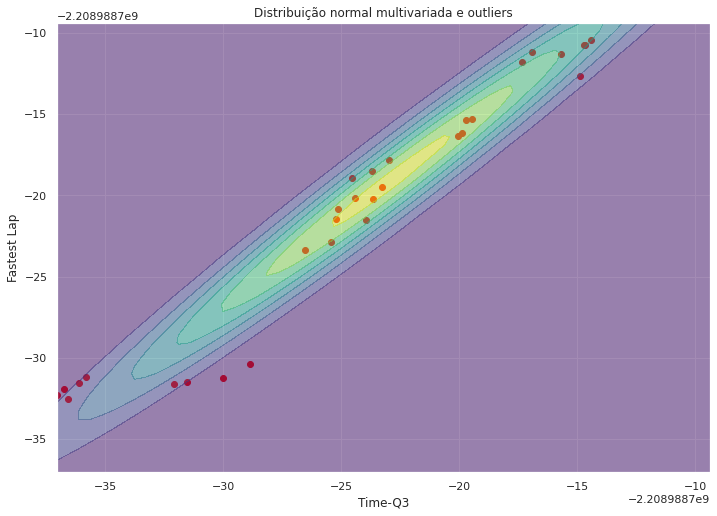

In [ ]:
X = df.iloc[:,[False, False, False,True, False, False, False, False, True, False,False]]
x = X[["Time-Q3"]].values
y = X[["Fastest Lap"]].values

N = 60
xx = np.linspace(x.min(), x.max(), N)
yy = np.linspace(x.min(), x.max(), N)

xx, yy = np.meshgrid(xx, yy)
pos2 = np.dstack((xx,yy))

mu = np.mean(X)
Sigma = np.cov(X.T)

rv = multivariate_normal(mu, Sigma)
Z = rv.pdf(pos2)
X = X.values
plt.scatter(X[:,0], X[:,1], color='red')
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.title("Distribuição normal multivariada e outliers")
plt.ylabel("Fastest Lap")
plt.xlabel("Time-Q3")
plt.show()